Rami, Nicola Srour (2025)

Title: Pakistan largest e-commerce, neural networks classifier

In [ ]:
# import required libraries

import pandas as pd
import sklearn.model_selection

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# show dataset and all its columns
df = pd.read_csv("Pakistan Largest Ecommerce Dataset.csv")
pd.set_option('display.max_columns', None)
df.head(3)

<ipython-input-2-10bdb1666dc5>:2: DtypeWarning: Columns (1,2,3,7,8,9,11,12,13,14,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Pakistan Largest Ecommerce Dataset.csv")


,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,0.0,cod,7/1/2016,#REF!,"1,950",2016.0,7.0,2016-7,7-2016,FY17,1.0,NaN,NaN,NaN,NaN,NaN
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444,Beauty & Grooming,\N,0.0,cod,7/1/2016,Gross,240,2016.0,7.0,2016-7,7-2016,FY17,2.0,NaN,NaN,NaN,NaN,NaN
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,\N,0.0,cod,7/1/2016,Gross,"2,450",2016.0,7.0,2016-7,7-2016,FY17,3.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
# remove not needed fatures
df = df.drop(['item_id', 'sku', 'increment_id', 'sales_commission_code', 'Customer ID', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'], axis=1)
# delete duplicate values
df = df.drop_duplicates()
# remove null values
df = df.dropna()
df.head(4)

,status,created_at,price,qty_ordered,grand_total,category_name_1,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY
0,complete,7/1/2016,1950.0,1.0,1950.0,Women's Fashion,0.0,cod,7/1/2016,#REF!,"1,950",2016.0,7.0,2016-7,7-2016,FY17
1,canceled,7/1/2016,240.0,1.0,240.0,Beauty & Grooming,0.0,cod,7/1/2016,Gross,240,2016.0,7.0,2016-7,7-2016,FY17
2,canceled,7/1/2016,2450.0,1.0,2450.0,Women's Fashion,0.0,cod,7/1/2016,Gross,"2,450",2016.0,7.0,2016-7,7-2016,FY17
3,complete,7/1/2016,360.0,1.0,60.0,Beauty & Grooming,300.0,cod,7/1/2016,Net,360,2016.0,7.0,2016-7,7-2016,FY17


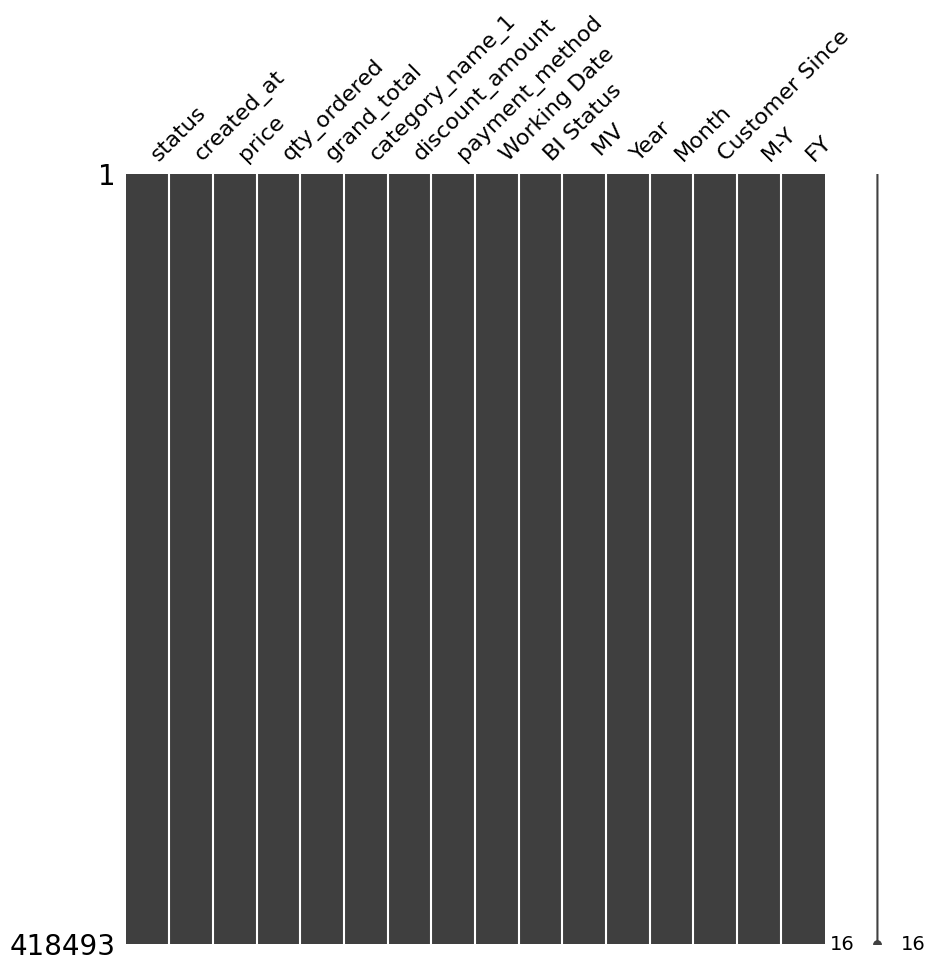

In [ ]:
# make sure no null values exist
import missingno as msno
msno.matrix(df, figsize=(10, 10))
plt.show()

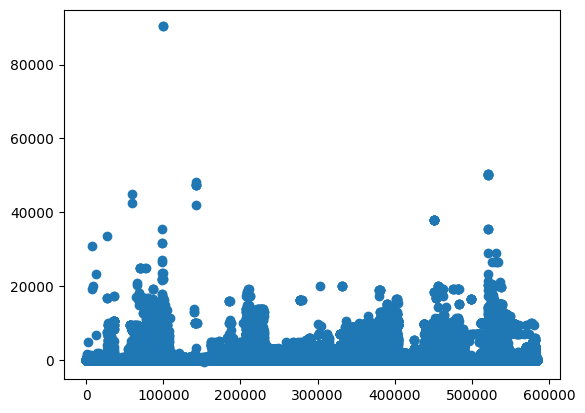

In [ ]:
# use scatter plot to remove outliers

plt.scatter(df.index, df['discount_amount'])
plt.show()

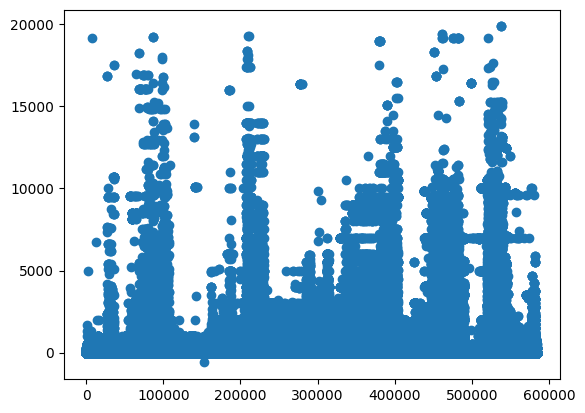

In [ ]:
df = df[df['discount_amount'] < 20000]
plt.scatter(df.index, df['discount_amount'])
plt.show()

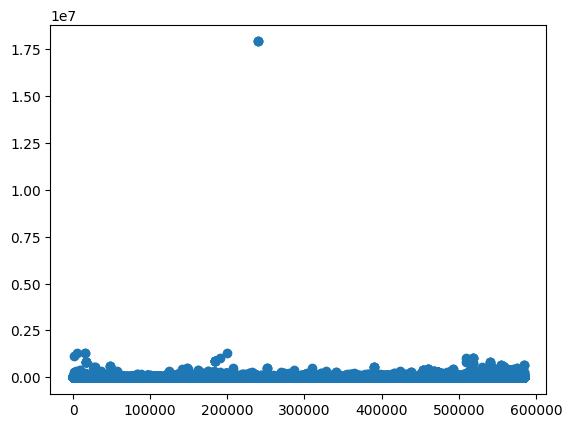

In [ ]:
plt.scatter(df.index, df['grand_total'])
plt.show()

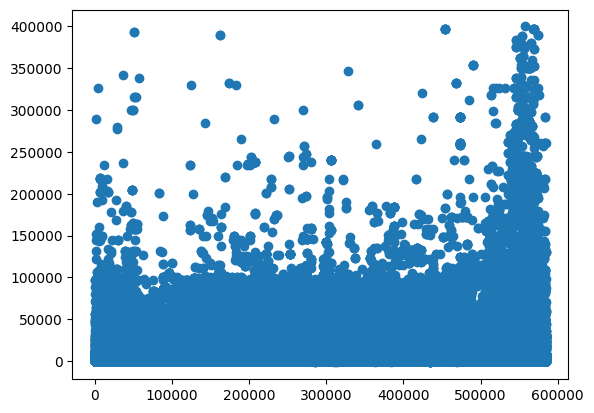

In [ ]:
df = df[df['grand_total'] < 400000]
plt.scatter(df.index, df['grand_total'])
plt.show()

In [ ]:
# do the same with MV column but first i have to turn totally to string
# i couldn't selected it by its name so i used iloc method
df.iloc[:, 10] = df.iloc[:, 10].str.replace(",","")
df.iloc[:, 10] = pd.to_numeric(df.iloc[:, 10], errors="coerce")
df = df.dropna()
df.iloc[:, 10] = df.iloc[:, 10].astype(float)

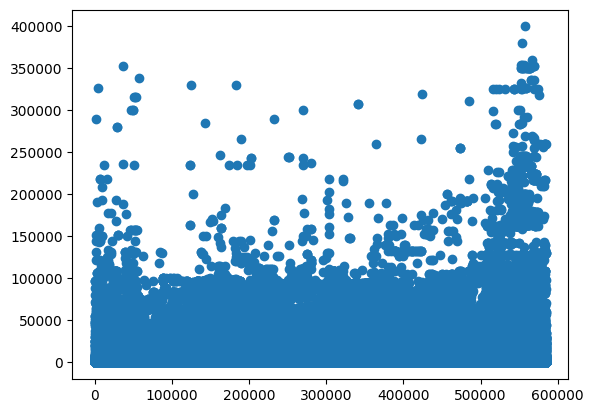

In [ ]:
plt.scatter(df.index, df.iloc[:, 10])
plt.show()

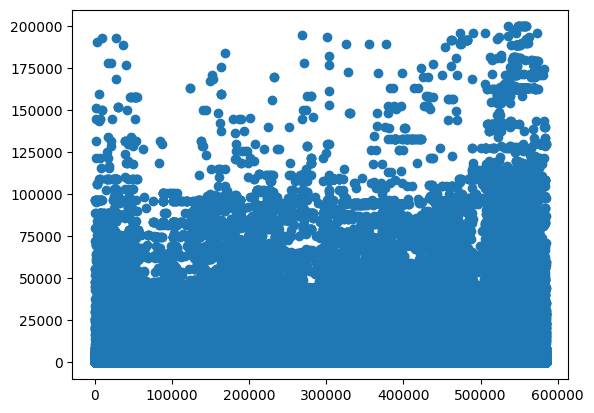

In [ ]:
df = df[df.iloc[:, 10] < 200000]
plt.scatter(df.index, df.iloc[:, 10])
plt.show()

In [ ]:
# show statistics of the dataset
df.describe()

,price,qty_ordered,grand_total,discount_amount,Year,Month
count,416828.000000,416828.000000,416828.000000,416828.000000,416828.000000,416828.000000
mean,5399.149447,1.228595,7334.910489,377.039749,2017.058026,7.129336
std,13594.252791,2.309734,17569.442263,1258.884665,0.675584,3.425869
min,0.100000,1.000000,-1594.000000,-599.500000,2016.000000,1.000000
25%,350.000000,1.000000,983.000000,0.000000,2017.000000,4.000000
50%,836.000000,1.000000,1777.600000,0.000000,2017.000000,7.000000
75%,2600.000000,1.000000,5199.000000,99.000000,2018.000000,11.000000
max,197917.000000,502.000000,396832.000000,19864.330000,2018.000000,12.000000


In [ ]:
# counting unique values in each column with cateogrical values to know which encoding method to use
uniquestatus= df['status'].nunique()
uniquecategoryname = df['category_name_1'].nunique()
uniquepaymentmethod = df['payment_method'].nunique()
uniquebistatus = df['BI Status'].nunique()
uniqueFY = df['FY'].nunique()

print(uniquestatus, uniquecategoryname, uniquepaymentmethod, uniquebistatus, uniqueFY )

16 16 18 4 3


In [ ]:
# encode categorical values to numbers
df['FY'] = df['FY'].replace({'FY17':1,'FY18':2,'FY19': 3})
df['BI Status'] = df['BI Status'].replace({'#REF!':1,'Gross':2,'Net': 3, 'Valid':4})
df.head(3)

<ipython-input-14-99bdbed91152>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['FY'] = df['FY'].replace({'FY17':1,'FY18':2,'FY19': 3})
<ipython-input-14-99bdbed91152>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['BI Status'] = df['BI Status'].replace({'#REF!':1,'Gross':2,'Net': 3, 'Valid':4})


,status,created_at,price,qty_ordered,grand_total,category_name_1,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY
0,complete,7/1/2016,1950.0,1.0,1950.0,Women's Fashion,0.0,cod,7/1/2016,1,1950.0,2016.0,7.0,2016-7,7-2016,1
1,canceled,7/1/2016,240.0,1.0,240.0,Beauty & Grooming,0.0,cod,7/1/2016,2,240.0,2016.0,7.0,2016-7,7-2016,1
2,canceled,7/1/2016,2450.0,1.0,2450.0,Women's Fashion,0.0,cod,7/1/2016,2,2450.0,2016.0,7.0,2016-7,7-2016,1


In [ ]:
# encode categorical values to numbers
df['FY'] = df['FY'].replace({'FY17':1,'FY18':2,'FY19': 3})
df['BI Status'] = df['BI Status'].replace({'#REF!':1,'Gross':2,'Net': 3, 'Valid':4})
df.head(2)

,status,created_at,price,qty_ordered,grand_total,category_name_1,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY
0,complete,7/1/2016,1950.0,1.0,1950.0,Women's Fashion,0.0,cod,7/1/2016,1,1950.0,2016.0,7.0,2016-7,7-2016,1
1,canceled,7/1/2016,240.0,1.0,240.0,Beauty & Grooming,0.0,cod,7/1/2016,2,240.0,2016.0,7.0,2016-7,7-2016,1


In [ ]:
# changed date columns values to date data
df['created_at'] = pd.to_datetime(df['created_at'])
df['Working Date'] = pd.to_datetime(df['Working Date'])
df['Customer Since'] = pd.to_datetime(df['Customer Since'])
df['M-Y'] = pd.to_datetime(df['M-Y'])

<ipython-input-16-264fb66e2202>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['M-Y'] = pd.to_datetime(df['M-Y'])


In [ ]:
# use label encoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['category_name_1'] = encoder.fit_transform(df['category_name_1'])
df['payment_method'] = encoder.fit_transform(df['payment_method'])
df['status'] = encoder.fit_transform(df['status'])
df['created_at'] = encoder.fit_transform(df['created_at'])
df['Working Date'] = encoder.fit_transform(df['Working Date'])
df['Customer Since'] = encoder.fit_transform(df['Customer Since'])
df['M-Y'] = encoder.fit_transform(df['M-Y'])
df.head(3)

,status,created_at,price,qty_ordered,grand_total,category_name_1,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY
0,4,0,1950.0,1.0,1950.0,14,0.0,6,0,1,1950.0,2016.0,7.0,0,0,1
1,1,0,240.0,1.0,240.0,1,0.0,6,0,2,240.0,2016.0,7.0,0,0,1
2,1,0,2450.0,1.0,2450.0,14,0.0,6,0,2,2450.0,2016.0,7.0,0,0,1


In [ ]:
# see types of columns
df.dtypes

,0
status,int64
created_at,int64
price,float64
qty_ordered,float64
grand_total,float64
category_name_1,int64
discount_amount,float64
payment_method,int64
Working Date,int64
BI Status,int64


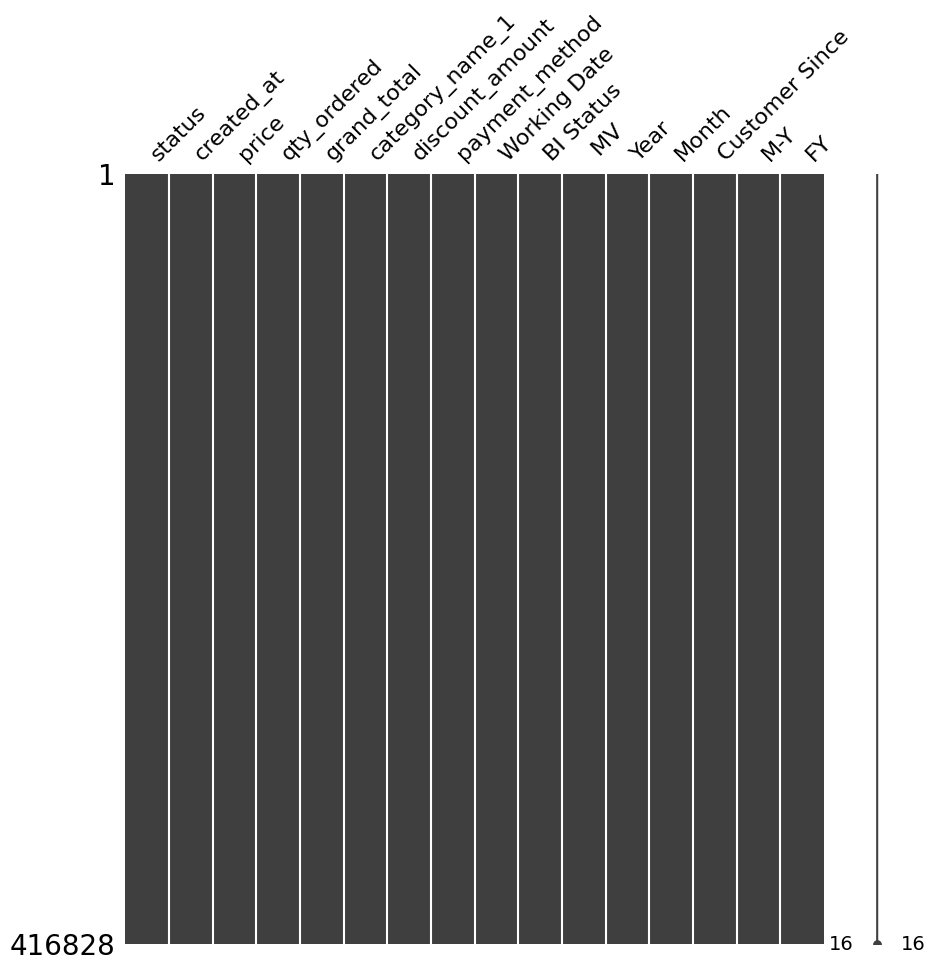

In [ ]:
# make sure again no null values exist
import missingno as msno
msno.matrix(df, figsize=(10, 10))
plt.show()

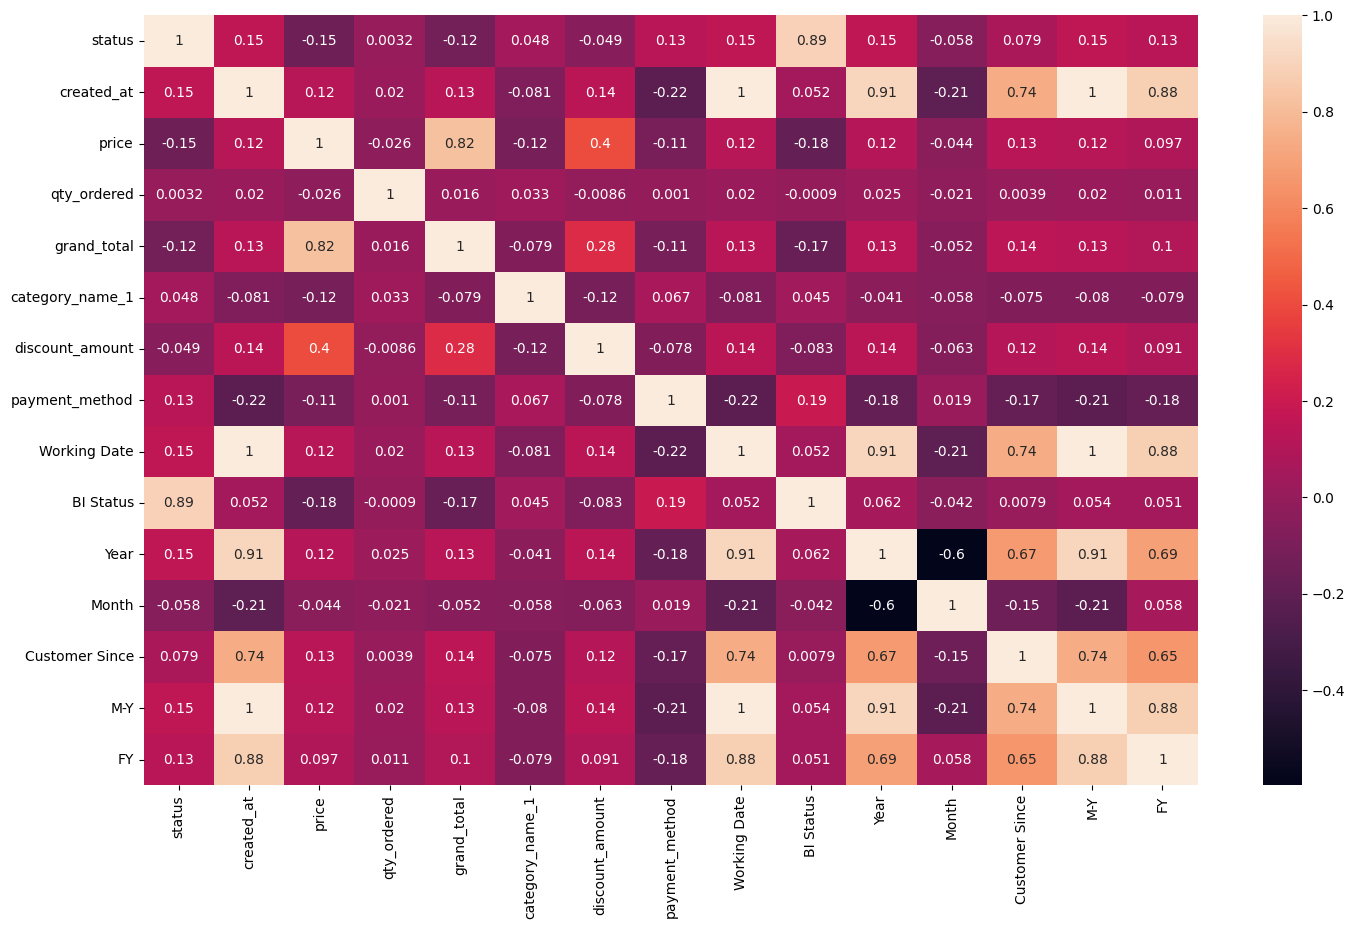

In [ ]:
# find correlation matrix

plt.figure(figsize=(17,10))
corrmatrix =  df.select_dtypes(include=['number']).corr()
sns.heatmap(corrmatrix, annot=True)
plt.show()

In [ ]:
# split the dataset, build, train and test the machine learning models
x = df.drop(['category_name_1'], axis=1)
y = df['category_name_1']
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x,y,stratify=y)
print("df:", df.shape)
print("x_train:", x_train.shape)
print("y_train:", y_train.shape)
print("x_test:", x_test.shape)
print("y_test:", y_test.shape)

df: (416828, 16)
x_train: (312621, 15)
y_train: (312621,)
x_test: (104207, 15)
y_test: (104207,)


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(15,)),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(16, activation = 'softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


9770/9770 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.2050 - loss: 97.7386
Epoch 2/10
9770/9770 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.2250 - loss: 15.5457
Epoch 3/10
9770/9770 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.2970 - loss: 2.3457
Epoch 4/10
9770/9770 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - accuracy: 0.3139 - loss: 2.0940
Epoch 5/10
9770/9770 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.3136 - loss: 2.1191
Epoch 6/10
9770/9770 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.3206 - loss: 2.0852
Epoch 7/10
9770/9770 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.3201 - loss: 2.0803
Epoch 8/10
9770/9770 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.3230 - loss: 2.0743
Epoch 9/10
9770/9770 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.3270 - loss: 2.0725
Epoch 10/10
9770/9770 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.3266 - loss: 2.0696


In [ ]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

the_predictions = probability_model.predict(x_test)

3257/3257 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


In [ ]:
from sklearn.metrics import accuracy_score
predictions_c = np.argmax(the_predictions, axis =1)
acc = accuracy_score(y_test, predictions_c)
print(acc)

0.3055073075705087


In [ ]:
ypredprob = model.predict(x_test)
roc = sklearn.metrics.roc_auc_score(y_test,ypredprob, multi_class='ovo')
roc2 = sklearn.metrics.roc_auc_score(y_test,ypredprob, multi_class='ovr')
print(roc, roc2)

3257/3257 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
0.740105252149955 0.7461997472260151


Dataset Reference:
Usmani, Z and Rasheed. S, (2021), Pakistan's Largest E-Commerce Dataset, Kaggle, Available at: https://www.kaggle.com/datasets/zusmani/pakistans-largest-ecommerce-dataset, (Accessed : 04/04/2025)